In [1]:
import datetime
from csbdeep.io import load_training_data
from csbdeep.utils import axes_dict, plot_some, plot_history
import matplotlib.pyplot as plt
from csbdeep.models import Config, CARE
from actin_tubules_sim.loss import mse_ssim
import tensorflow as tf
import os
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

In [2]:
root_dir = '/Users/vkapoor/Downloads/Microtubules'
model_dir = os.path.join(root_dir, 'DenoisingCARE/')
os.makedirs(model_dir, exist_ok=True)
train_data_file = f'{root_dir}/Train/DN/microtubule_dn_training_data.npz'
log_dir = "logs/fitDN/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [3]:
(X,Y), (X_val,Y_val), axes = load_training_data(train_data_file, validation_split=0.1, verbose=True)

c = axes_dict(axes)['C']
n_channel_in, n_channel_out = X.shape[c], Y.shape[c]
X = X[:, 1:, :, :, :]
X_val = X_val[:, 1:, :, :, :]
Y = Y[:, 1:, :, :, :]
Y_val = Y_val[:, 1:, :, :, :]


number of training images:	 495
number of validation images:	 55
image size (3D):		 (9, 128, 128)
axes:				 SZYXC
channels in / out:		 1 / 1


In [4]:
X.shape,Y.shape,X_val.shape

((495, 8, 128, 128, 1), (495, 8, 128, 128, 1), (55, 8, 128, 128, 1))

Text(0.5, 0.98, '5 example validation patches (top row: source, bottom row: target)')

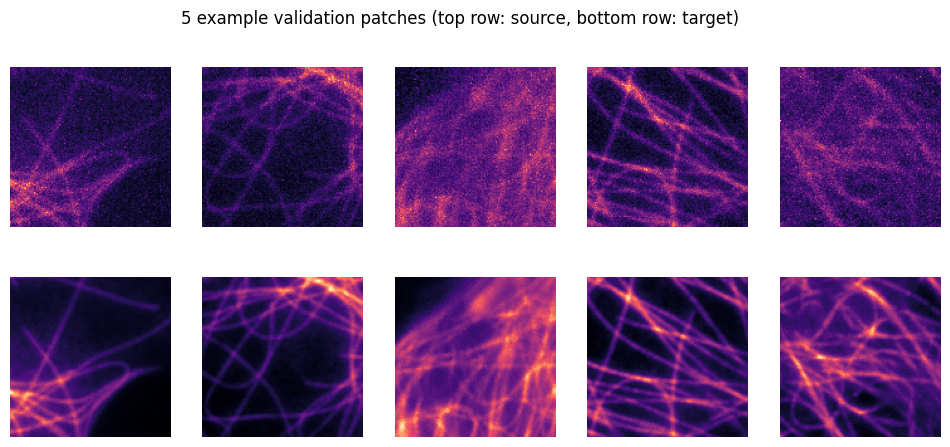

In [5]:
plt.figure(figsize=(12,5))
plot_some(X_val[:5],Y_val[:5])
plt.suptitle('5 example validation patches (top row: source, bottom row: target)')

In [6]:
init_lr = 1e-4
batch_size = 3
epochs = 10

X.shape

(495, 8, 128, 128, 1)

## Training
Training the model will likely take some time. We recommend to monitor the progress with [TensorBoard](https://www.tensorflow.org/programmers_guide/summaries_and_tensorboard), which allows you to inspect the losses during training.

You can start TensorBoard from the current working directory with `tensorboard --logdir=.` Then connect to http://localhost:6006/ with your browser.

In [7]:
config = Config(axes, n_channel_in, n_channel_out, train_epochs=epochs, train_batch_size = batch_size, train_learning_rate = init_lr)
print(config)
vars(config)
model = CARE(config, 'microtubule_care', basedir=model_dir)
history = model.train(X,Y, validation_data=(X_val,Y_val))


/Users/vkapoor/miniconda3/envs/kapoorlabsenv/lib/python3.10/site-packages/csbdeep/models/base_model.py:149: UserWarning: output path for model already exists, files may be overwritten: /Users/vkapoor/Downloads/Microtubules/DenoisingCARE/microtubule_care
  warnings.warn('output path for model already exists, files may be overwritten: %s' % str(self.logdir.resolve()))


Config(n_dim=3, axes='ZYXC', n_channel_in=1, n_channel_out=1, train_checkpoint='weights_best.h5', train_checkpoint_last='weights_last.h5', train_checkpoint_epoch='weights_now.h5', probabilistic=False, unet_residual=True, unet_n_depth=2, unet_kern_size=3, unet_n_first=32, unet_last_activation='linear', unet_input_shape=(None, None, None, 1), train_loss='mae', train_epochs=10, train_steps_per_epoch=400, train_learning_rate=0.0001, train_batch_size=3, train_tensorboard=True, train_reduce_lr={'factor': 0.5, 'patience': 10, 'min_delta': 0})
Epoch 1/10
Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x28fa45cf0>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_

Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x28fa45cf0>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x28fa45cf0>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x28fda6200>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x28fda6200>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x28fda6200>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x28fda5f30>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x28fda5f30>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _mean_or_not.<locals>.<lambda> at 0x28fda5f30>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: K.mean(x, axis=-1)

Match 1:
lambda x: x

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
400/400 [==============================] - 7150s 18s/step - loss: 0.0411 - mse: 0.0036 - mae: 0.0411 - val_loss: 0.0331 - val_mse: 0.0021 - val_mae: 0.0331 - lr: 1.0000e-04
Epoch 2/10
201/400 [==============>...............] - ETA: 59:06 - loss: 0.0307 - mse: 0.0019 - mae: 0.0307

['loss', 'lr', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse']


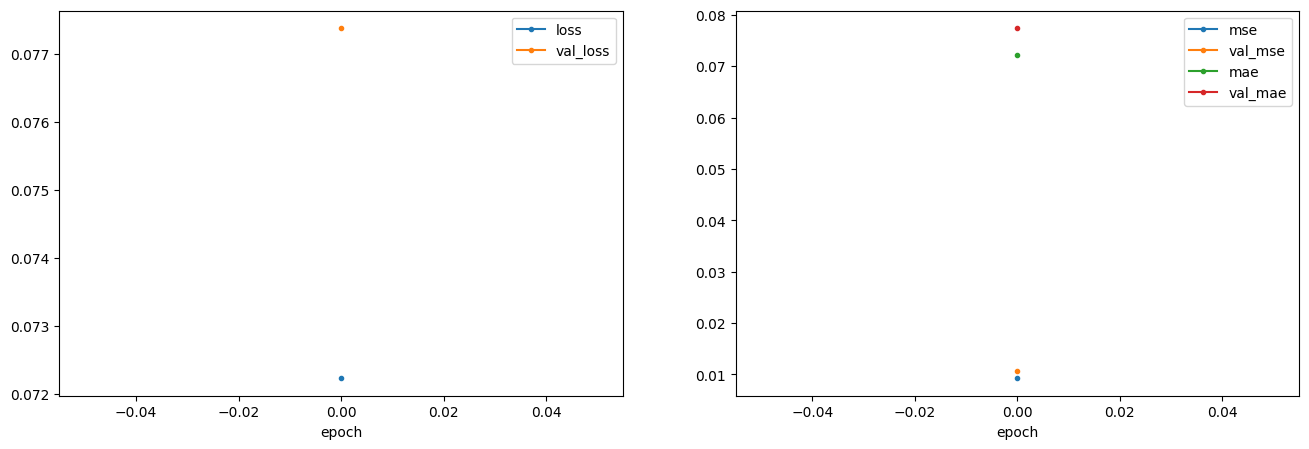

In [ ]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss'],['mse','val_mse','mae','val_mae']);

1/1 [==============================] - 1s 960ms/step


Text(0.5, 0.98, '5 example validation patches\ntop row: input (source),  middle row: target (ground truth),  bottom row: predicted from source')

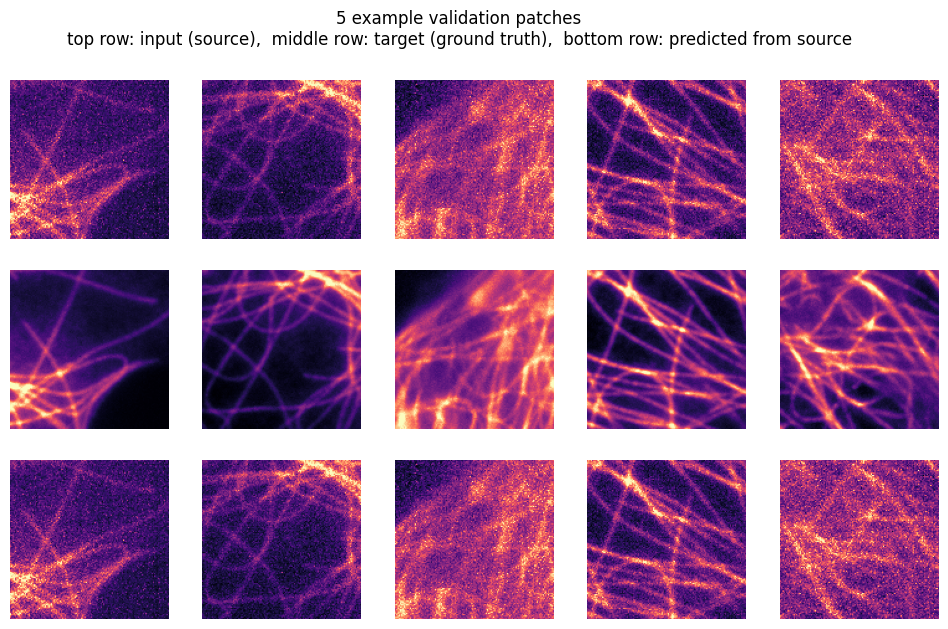

In [ ]:
plt.figure(figsize=(12,7))
_P = model.keras_model.predict(X_val[:5])
if config.probabilistic:
    _P = _P[...,:(_P.shape[-1]//2)]
plot_some(X_val[:5],Y_val[:5],_P,pmax=99.5)
plt.suptitle('5 example validation patches\n'      
             'top row: input (source),  '          
             'middle row: target (ground truth),  '
             'bottom row: predicted from source')